In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2
from PIL import Image
from sklearn.metrics import accuracy_score

In [3]:
train_path = './Dataset_2/Train/'
test_path = 'Dataset_2/Test/'
data_dir = './Dataset_2'

train_lable = 'Dataset_2/Train.csv'
test_lable = 'Dataset_2/Test.csv'

In [4]:
NUM_CATEGORIES = len(os.listdir(train_path))
NAME_CATEGORIES = os.listdir(train_path)
print(NUM_CATEGORIES)
print(NAME_CATEGORIES)

43
['12', '16', '19', '32', '28', '30', '40', '24', '4', '2', '14', '38', '9', '20', '3', '41', '7', '0', '17', '39', '34', '22', '33', '8', '42', '1', '5', '27', '31', '26', '10', '25', '35', '6', '36', '15', '37', '23', '21', '18', '11', '29', '13']


In [5]:
# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [6]:
# move resize
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)
    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            #列表不够整齐，如果创建多维列表，子列表中的元素得个数一致，如果不一致，那么默认还是一维列表，把子列表当做元素而已
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))      
            imgray = cv2.cvtColor(np.array(resize_image), cv2.COLOR_BGR2GRAY)
            flat_arr=imgray.ravel()
            image_data.append(flat_arr)
            image_labels.append(i)
        except:
            print("Error in " + img)

In [7]:
test = pd.read_csv(data_dir + '/Test.csv')
labels = test["ClassId"].values
imgs = test["Path"].values
test_data =[]
for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        imgray = cv2.cvtColor(np.array(resize_image), cv2.COLOR_BGR2GRAY)
        flat_arr=imgray.ravel()
        test_data.append(np.array(flat_arr))
    except:
        print("Error in " + img)

In [8]:
X_test = np.array(test_data)
X_test = X_test/255

In [9]:
img_dict={"images":np.array(imgray),"data":np.array(image_data),"target":np.array(image_labels)}
train = img_dict['data']/255

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, img_dict['target'], test_size=0.3, random_state=0, shuffle=True)

In [11]:
# 95% of variance
from sklearn.decomposition import PCA
# pca = PCA(n_components = 0.95)
pca=PCA(n_components=100,whiten=True,random_state=0)
pca.fit(X_train)
pca.fit(X_val)
pca.fit(X_test)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

In [12]:
X_train_pca

array([[-0.7487826 , -0.26083154,  0.06633638, ..., -1.00410617,
        -0.0887528 , -0.34885683],
       [-0.83103331,  0.26372545, -0.14925508, ...,  0.2018063 ,
        -1.26105274,  0.05389756],
       [ 0.29288685, -1.04378985,  1.90268636, ...,  0.73883866,
        -1.10158885, -2.65068254],
       ...,
       [-0.43325398, -1.58455107, -0.60480919, ..., -0.26368025,
        -0.2736608 , -0.56259314],
       [ 0.00954755,  0.57986993, -1.62943862, ..., -0.19022898,
        -0.55347279, -0.33798212],
       [-0.79031262, -1.1172272 ,  0.39392365, ...,  0.40376295,
        -0.11900641,  0.11054922]])

In [13]:
X_val_pca

array([[ 2.49595208,  1.87593391, -1.60728667, ..., -1.0874218 ,
        -0.04483657, -0.33809304],
       [-0.2045581 , -0.28700941,  0.14812244, ..., -0.04261442,
         0.76584491,  0.23062146],
       [-1.21350271,  0.33278802, -0.17967376, ...,  0.09315912,
         0.16033005,  0.48513361],
       ...,
       [-0.29555364, -1.16877664,  0.38088399, ..., -0.31782027,
        -0.19104242, -1.32503549],
       [-0.43508858, -0.29380329,  1.15677327, ...,  0.54104337,
         1.27994992,  0.52844337],
       [-0.98773478,  0.50333583, -0.22577543, ...,  1.15630956,
         0.94484558, -0.05485733]])

# RandomForest

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)
dtc = dtc.fit(X_train_pca,y_train)
rfc = rfc.fit(X_train_pca,y_train)
score_c = dtc.score(X_val_pca,y_val)
score_r = rfc.score(X_val_pca,y_val)
print("Single Tree:{}".format(score_c),"Random Forest:{}".format(score_r))

Single Tree:0.4860154722434753 Random Forest:0.8405168749468673


In [28]:
dtc_pred = dtc.predict(X_test_pca)
rf_pred = rfc.predict(X_test_pca)

#Accuracy with the test data
print('Single Tree Test Data accuracy: ',accuracy_score(labels,dtc_pred))
print('Randomforest Test Data accuracy: ',accuracy_score(labels,rf_pred))

Single Tree Test Data accuracy:  0.32367379255740303
Randomforest Test Data accuracy:  0.6119556611243072


# GaussianNB

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train_pca,y_train)
score = gnb.score(X_val_pca,y_val)
print('准确率：',score)

准确率： 0.41554025333673383


In [30]:
gnb_pred = gnb.predict(X_test_pca)
print('Gaussian naive bayes Test Data accuracy: ',accuracy_score(labels,gnb_pred))

Gaussian naive bayes Test Data accuracy:  0.3793349168646081


# SVM

In [14]:
from sklearn.svm import SVC
svc = SVC(kernel="linear",random_state=0)
svc.fit(X_train_pca, y_train)#训练
y_predict = svc.predict(X_val_pca)#预测
print(accuracy_score(y_val, y_predict))#评分

0.9176230553430247


In [15]:
svc_pred = svc.predict(X_test_pca)
print('SVC Test Data accuracy: ',accuracy_score(labels,svc_pred))

SVC Test Data accuracy:  0.7993665874901029


# KNeighborsClassifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_pca,y_train)
y_predict = svc.predict(X_val_pca)
print(accuracy_score(y_val, y_predict)) #评分

0.9176230553430247


In [34]:
knn_pred = knn.predict(X_test_pca)
print(accuracy_score(labels,knn_pred))

0.6140142517814727


# Adaboost

In [13]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train_pca, y_train)
y_pred = clf_xgb.predict(X_val_pca)
accuracy = accuracy_score(y_val, y_pred)
print(f'val XGB: {accuracy}')

val XGB: 0.8739267193743093


In [14]:
adaboost_pred = clf_xgb.predict(X_test_pca)
print('adaboost Test Data accuracy: ',accuracy_score(labels,adaboost_pred))

adaboost Test Data accuracy:  0.6755344418052257


# show result

confusion_matrix is:
[[ 29  22   1 ...   0   0   0]
 [ 15 606  44 ...  12   0   1]
 [  3  39 638 ...   0   0   0]
 ...
 [  1   1   0 ...  42   0   0]
 [  0   0   0 ...   0  43   6]
 [  0   0   0 ...   0   6  69]]


<AxesSubplot:>

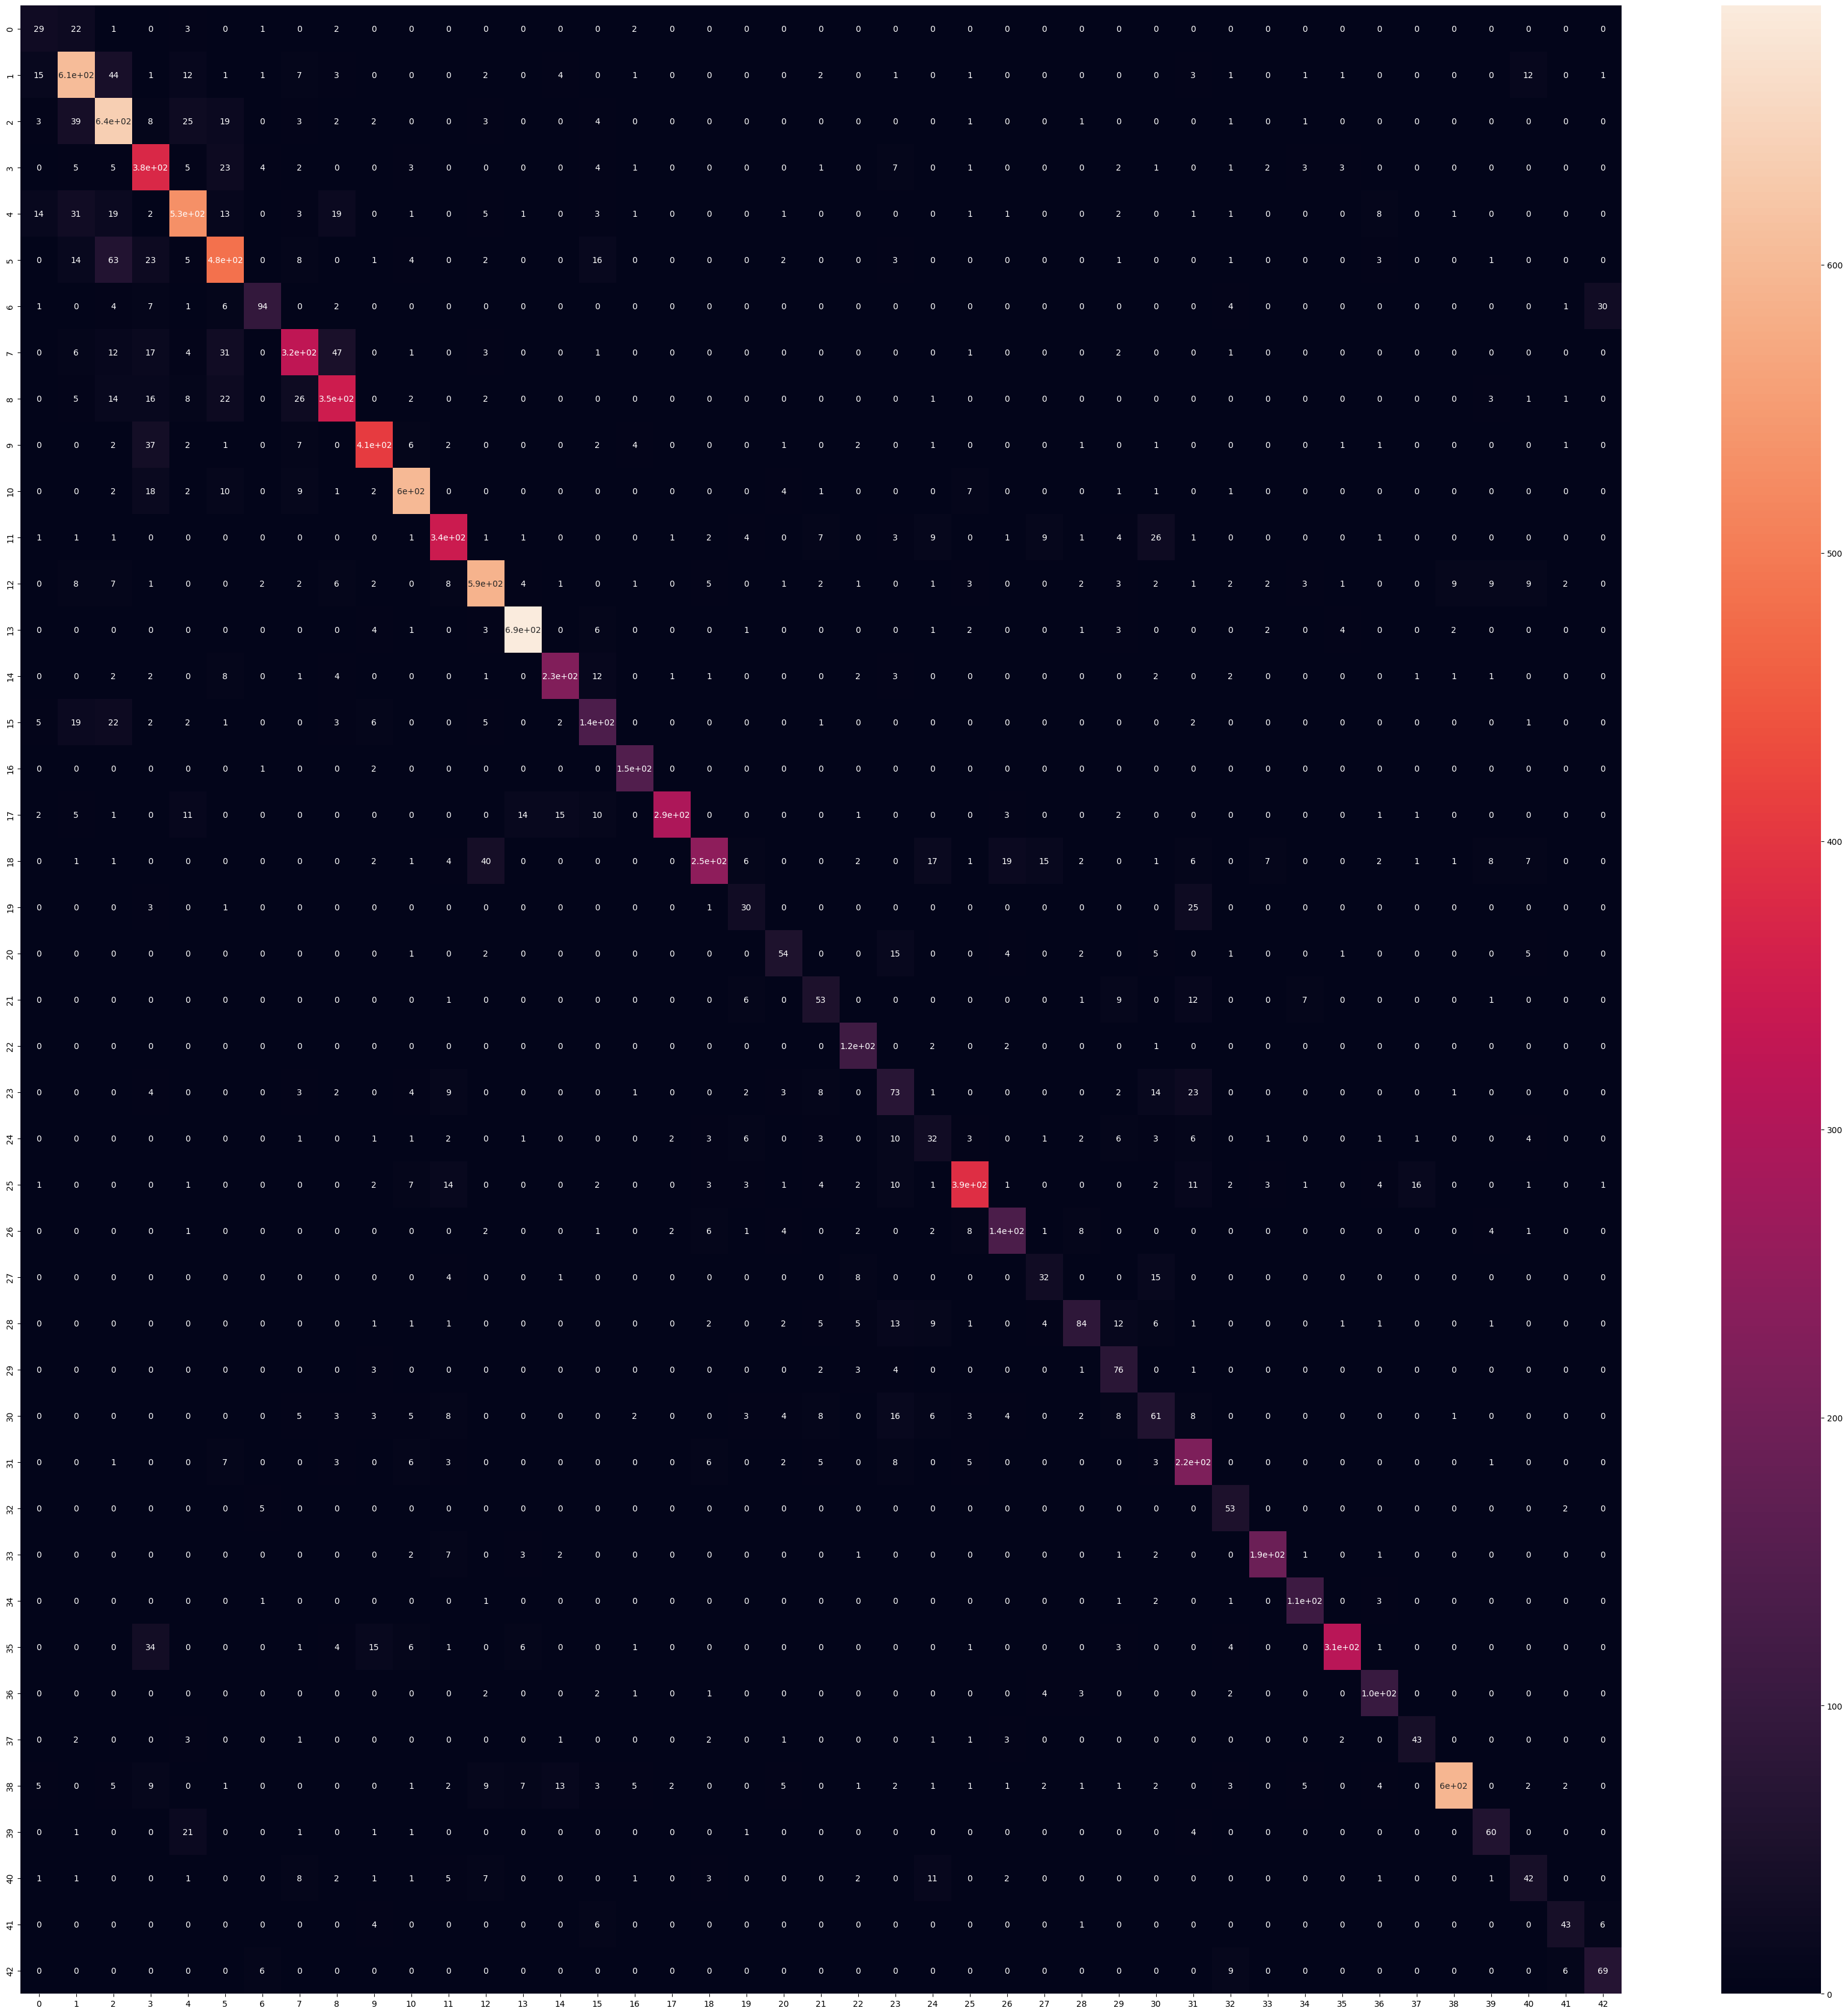

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(labels, svc_pred)
print(f'confusion_matrix is:\n{cm}')
plt.figure(figsize = cm.shape)
sns.heatmap(cm, annot=True)

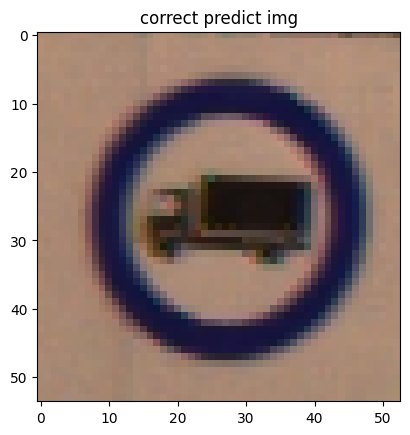

In [17]:
import matplotlib.pyplot as plt

for i in range(0,len(labels)):
    if labels[i] ==svc_pred[i]:
        image = cv2.imread(data_dir + '/' +imgs[i])
        plt.title('correct predict img')
        plt.imshow(image)
        break

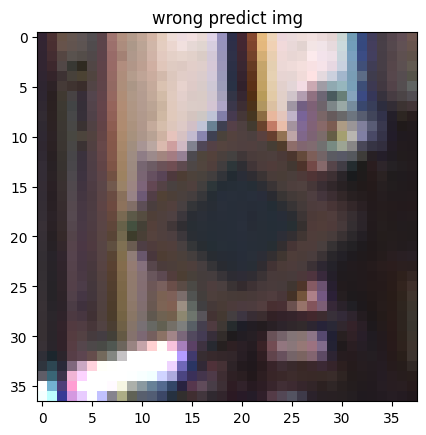

In [18]:
for i in range(0,len(labels)):
    if labels[i] !=svc_pred[i]:
        image = cv2.imread(data_dir + '/' +imgs[i])
        plt.title('wrong predict img')
        plt.imshow(image)
        break